## (Before using the code, read the technical note attached to this repository to see in detail the formulas and values used for this plot!)

## Required libraries for the plot

In [1]:
import numpy
import matplotlib
import matplotlib.pyplot as plt
import cmath
import random

## Parameters and mass equations used

The parameters and fixed values are listed here separated in NH and IH parameters, same situation for the mass equations (equation 7 at the technical note), for the NH all the mass equations are in terms of $m_1$ and for the IH, in terms of $m_3$, here are not only listed the best fit values, there are also listed the +3/-3 $\sigma$ values for all the masses to get not only the best fit value plot, but also including the uncertainties for the plot.

Note that we are including $s_{14}$ and $\Delta m^2_{41}$ as $\Delta m^2_{\text{LSND}}$ to add $m_{light}$ dependence to $m_{4}$

In [3]:
#Normal hierarchy parameters (Best Fit)

NHs12=0.307
NHs13=0.022
NHc12=0.693
NHc13=0.978
NHs14=0.023
NHc14=0.977

solarmass=0.0000753
atmmass=0.0025283
LSNDmass=1.78

#solarmass=del_m21^2
#atmmass=del_m31^2

#Normal hierarchy parameters (3 sigma)

maxNHs12=0.346
minNHs12=0.268

maxNHs13=0.0241
minNHs13=0.0199

maxNHc12=0.732
minNHc12=0.654

maxNHc13=0.9801
minNHc13=0.9759

maxNHs14=0.04
minNHs14=0.006

maxNHc14=0.96
minNHc14=0.994

maxsolarmass=0.0000807
minsolarmass=0.0000699

maxatmmass=0.0025631
minatmmass=0.0024935

maxLSNDmass=2.01
minLSNDmass=1.61

NHm1=numpy.linspace(0.0001,0.001,2000) 
NHm1=numpy.append(NHm1, numpy.linspace(0.001,0.01,2000))
NHm1=numpy.append(NHm1, numpy.linspace(0.01,0.1,2000))
NHm1=numpy.append(NHm1, numpy.linspace(0.1,1,2000))
NHm1=numpy.append(NHm1, numpy.linspace(1,10,2000))

maxNHm2=(NHm1**2+maxsolarmass)**(1/2)
NHm2=(NHm1**2+solarmass)**(1/2)
minNHm2=(NHm1**2+minsolarmass)**(1/2)

maxNHm3=(NHm1**2+maxatmmass)**(1/2)
NHm3=(NHm1**2+atmmass)**(1/2)
minNHm3=(NHm1**2+minatmmass)**(1/2)

maxNHm4=(NHm1**2+maxLSNDmass)**(1/2)
NHm4=(NHm1**2+LSNDmass)**(1/2)
minNHm4=(NHm1**2+minLSNDmass)**(1/2)

In [4]:
#Inverted Hierarchy parameters (Best Fit)

IHs12=0.307
IHs13=0.022
IHc12=0.693
IHc13=0.978
IHs14=0.023
IHc14=0.977

Isolarmass=0.0000753
Iatmmass=0.002536
ILSNDmass=1.78

#Inverted Hierarchy parameters (3 sigma)

maxIHs12=0.346
minIHs12=0.268

maxIHs13=0.0241
minIHs13=0.0199

maxIHc12=0.732
minIHc12=0.654

maxIHc13=0.9801
minIHc13=0.9759

maxIHs14=0.04
minIHs14=0.006

maxIHc14=0.994
minIHc14=0.96

maxIsolarmass=0.0000807
minIsolarmass=0.0000699

maxIatmmass=0.002638
minIatmmass=0.002434

maxILSNDmass=2.01
minILSNDmass=1.61

IHm3=numpy.linspace(0.0001,0.001,2000) 
IHm3=numpy.append(IHm3, numpy.linspace(0.001,0.01,2000))
IHm3=numpy.append(IHm3, numpy.linspace(0.01,0.1,2000))
IHm3=numpy.append(IHm3, numpy.linspace(0.1,1,2000))
IHm3=numpy.append(IHm3, numpy.linspace(1,10,2000))

maxIHm2=(IHm3**2+maxIsolarmass+maxIatmmass)**(1/2)
IHm2=(IHm3**2+Isolarmass+Iatmmass)**(1/2)
minIHm2=(IHm3**2+minIsolarmass+minIatmmass)**(1/2)

maxIHm1=(IHm3**2+maxIatmmass)**(1/2)
IHm1=(IHm3**2+Iatmmass)**(1/2)
minIHm1=(IHm3**2+minIatmmass)**(1/2)

maxIHm4=(IHm3**2+maxILSNDmass+maxIatmmass)**(1/2)
IHm4=(IHm3**2+ILSNDmass+Iatmmass)**(1/2)
minIHm4=(IHm3**2+minILSNDmass+minIatmmass)**(1/2)

#solarmass=del_m21^2
#atmmass=del_m31^2

## Plot generator

This is the most important part of the code, on this cell is located the original $\langle{m_{ee}}\rangle$ formula and is written in terms of $m_{light}$ that is $m_{1}$ for NH and $m_{3}$ for IH, since there are infinite many possible combinations of parameters $\phi_{12}$, $\phi_{13}$, $\phi_{14}$ (equation 6 of the technical note), instead of running a code with infinite many curves, the code will just plug the curves that will bound all the possible angle combinations and fill the space between each curve to optimize compilation time and computer resources, the angles that created the boundaries were calculated previously using an optimization method (details and other equations used are located at the technical note). 

Note, these cells also include a lobster plot for 3 neutrinos with its best fit values to make a comparison to the new 1+3 neutrino plot.  

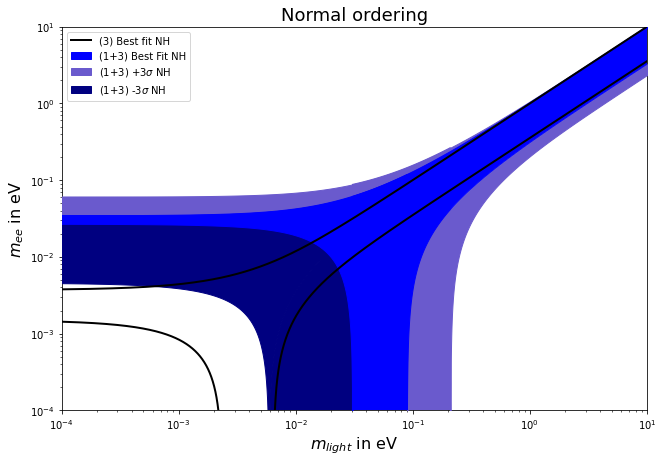

In [5]:
plt.figure(figsize=(9,6))

NHmee1=abs(NHc12*NHc13*NHm1 - NHs12*NHc13*NHm2 + NHs13*NHm3)                           
NHmee2=abs(NHc12*NHc13*NHm1 + NHs12*NHc13*NHm2 + NHs13*NHm3)
NHmee3=abs(NHc12*NHc13*NHm1 - NHs12*NHc13*NHm2 - NHs13*NHm3)

NHm1filt1=NHm1[NHm1<0.0024]
NHm1filt3=NHm1[NHm1>0.0065]
NHmee1filt1=NHmee1[NHm1<0.0024]
NHmee3filt3=NHmee3[NHm1>0.0065]

plt.plot(NHm1filt1,NHmee1filt1,color="black",label="(3) Best fit NH",linestyle="-",linewidth=2, alpha=1,zorder=18)
plt.plot(NHm1,NHmee2,color="black",linestyle="-",linewidth=2, alpha=1,zorder=18)
plt.plot(NHm1filt3,NHmee3filt3,color="black",linestyle="-",linewidth=2, alpha=1,zorder=18)



NHmee11=abs(NHc12*NHc13*NHc14*NHm1 + 
                  NHs12*NHc13*NHc14*NHm2*cmath.exp(complex(0,0)) + 
                  NHs13*NHm3*NHc14*cmath.exp(complex(0,0)) + 
                  NHs14*NHm4*cmath.exp(complex(0,0))) #All masses different, 0,0,0 (in terms of pi)

NHmee12=abs(NHc12*NHc13*NHc14*NHm1 + 
                  NHs12*NHc13*NHc14*NHm2*cmath.exp(complex(0,numpy.pi)) + 
                  NHs13*NHm3*NHc14*cmath.exp(complex(0,numpy.pi)) + 
                  NHs14*NHm4*cmath.exp(complex(0,numpy.pi))) #All masses different, 1,1,1 (in terms of pi)

NHmee13=abs(NHc12*NHc13*NHc14*NHm1 + 
                  NHs12*NHc13*NHc14*NHm2*cmath.exp(complex(0,0)) + 
                  NHs13*NHm3*NHc14*cmath.exp(complex(0,0)) + 
                  NHs14*NHm4*cmath.exp(complex(0,numpy.pi))) #All masses different, 0,0,$\pi$ 1 (in terms of pi)



maxNHmee11=abs(minNHc12*minNHc13*minNHc14*NHm1 + 
                  maxNHs12*minNHc13*minNHc14*maxNHm2*cmath.exp(complex(0,0)) + 
                  maxNHs13*maxNHm3*minNHc14*cmath.exp(complex(0,0)) + 
                  maxNHs14*maxNHm4*cmath.exp(complex(0,0))) #All masses different, 0,0,0 (in terms of pi)

maxNHmee12=abs(minNHc12*minNHc13*minNHc14*NHm1 + 
                  maxNHs12*minNHc13*minNHc14*maxNHm2*cmath.exp(complex(0,numpy.pi)) + 
                  maxNHs13*maxNHm3*minNHc14*cmath.exp(complex(0,numpy.pi)) + 
                  maxNHs14*maxNHm4*cmath.exp(complex(0,numpy.pi))) #All masses different, 1,1,1 (in terms of pi)

maxNHmee13=abs(minNHc12*minNHc13*minNHc14*NHm1 + 
                  maxNHs12*minNHc13*minNHc14*maxNHm2*cmath.exp(complex(0,0)) + 
                  maxNHs13*maxNHm3*minNHc14*cmath.exp(complex(0,0)) + 
                  maxNHs14*maxNHm4*cmath.exp(complex(0,numpy.pi))) #All masses different, 0,0,1 (in terms of pi)



minNHmee11=abs(maxNHc12*maxNHc13*maxNHc14*NHm1 + 
                  minNHs12*maxNHc13*maxNHc14*minNHm2*cmath.exp(complex(0,0)) + 
                  minNHs13*minNHm3*maxNHc14*cmath.exp(complex(0,0)) + 
                  minNHs14*minNHm4*cmath.exp(complex(0,0))) #All masses different, 0,0,0 (in terms of pi)

minNHmee12=abs(maxNHc12*maxNHc13*maxNHc14*NHm1 + 
                  minNHs12*maxNHc13*maxNHc14*minNHm2*cmath.exp(complex(0,numpy.pi)) + 
                  minNHs13*minNHm3*maxNHc14*cmath.exp(complex(0,numpy.pi)) + 
                  minNHs14*minNHm4*cmath.exp(complex(0,numpy.pi))) #All masses different, 1,1,1 (in terms of pi)

minNHmee13=abs(maxNHc12*maxNHc13*maxNHc14*NHm1 + 
                  minNHs12*maxNHc13*maxNHc14*minNHm2*cmath.exp(complex(0,0)) + 
                  minNHs13*minNHm3*maxNHc14*cmath.exp(complex(0,0)) + 
                  minNHs14*minNHm4*cmath.exp(complex(0,numpy.pi))) #All masses different, 0,0,1 (in terms of pi)

#plt.plot(NHm1,NHmee11,color="black",linestyle="-",linewidth=2, alpha=1,zorder=14)
#plt.plot(NHm1,NHmee12,color="blue",linestyle="-",linewidth=2, alpha=1,zorder=14)
#plt.plot(NHm1,NHmee13,color="red",linestyle="-",linewidth=2, alpha=1,zorder=14)

#plt.plot(NHm1,maxNHmee11,color="black",linestyle="--",linewidth=2, alpha=1,zorder=14)
#plt.plot(NHm1,maxNHmee12,color="blue",linestyle="--",linewidth=2, alpha=1,zorder=14)
#plt.plot(NHm1,maxNHmee13,color="red",linestyle="--",linewidth=2, alpha=1,zorder=14)

#plt.plot(NHm1,minNHmee11,color="black",linestyle="-.",linewidth=2, alpha=1,zorder=14)
#plt.plot(NHm1,minNHmee12,color="blue",linestyle="-.",linewidth=2, alpha=1,zorder=14)
#plt.plot(NHm1,minNHmee13,color="red",linestyle="-.",linewidth=2, alpha=1,zorder=14)

plt.fill_between(NHm1, NHmee11, NHmee12, color="blue",label="(1+3) Best Fit NH",alpha=1,zorder=13)
plt.fill_between(NHm1, NHmee11, NHmee13, color="blue",alpha=1,zorder=13)
plt.fill_between(NHm1, NHmee11, 0, where=(NHm1>NHm1[numpy.argmin(NHmee13)])&(NHm1<NHm1[numpy.argmin(NHmee12)]), color="blue",alpha=1,zorder=13)

plt.fill_between(NHm1, maxNHmee11, NHmee11, color="slateblue",label="(1+3) +3$\sigma$ NH",alpha=1,zorder=12)
plt.fill_between(NHm1, maxNHmee12, NHmee12, color="slateblue",alpha=1,zorder=12)
plt.fill_between(NHm1, maxNHmee11, 0, where=(NHm1>NHm1[numpy.argmin(NHmee13)])&(NHm1<NHm1[numpy.argmin(maxNHmee12)]), color="slateblue",alpha=1,zorder=12)

plt.fill_between(NHm1, minNHmee13, NHmee13, color="navy",label="(1+3) -3$\sigma$ NH",alpha=1,zorder=12)
plt.fill_between(NHm1, minNHmee13, 0, where=(NHm1>NHm1[numpy.argmin(minNHmee13)])&(NHm1<NHm1[numpy.argmin(NHmee13)]), color="navy",alpha=1,zorder=12)

plt.xscale("log")
plt.yscale("log")

plt.xlim(0.0001,10)
plt.ylim(0.0001,10)
plt.tight_layout()
plt.title("Normal ordering", fontsize=18)
plt.xlabel("$m_{light}$ in eV",fontsize=16)
plt.ylabel("$m_{ee}$ in eV",fontsize=16)
plt.legend(fontsize=10,loc=2)
plt.show()

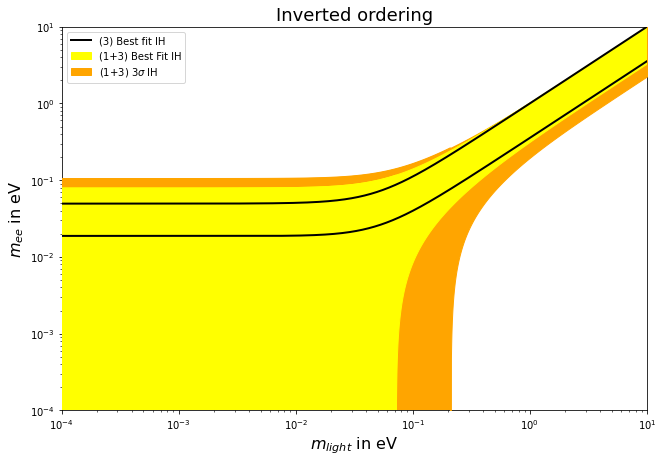

In [6]:
plt.figure(figsize=(9,6))

IHmee1=abs(IHc12*IHc13*IHm1 + IHs12*IHc13*IHm2 + IHs13*IHm3)
IHmee2=abs(IHc12*IHc13*IHm1 - IHs12*IHc13*IHm2 - IHs13*IHm3)

plt.plot(IHm3,IHmee1,color="black",label="(3) Best fit IH",linestyle="-",linewidth=2, alpha=1,zorder=18)
plt.plot(IHm3,IHmee2,color="black",linestyle="-",linewidth=2, alpha=1,zorder=18)

IHmee11=abs(IHc12*IHc13*IHc14*IHm1 + 
                  IHs12*IHc13*IHc14*IHm2*cmath.exp(complex(0,0)) + 
                  IHs13*IHm3*IHc14*cmath.exp(complex(0,0)) + 
                  IHs14*IHm4*cmath.exp(complex(0,0))) #All masses different, 0,0,0 (in terms of pi)

IHmee12=abs(IHc12*IHc13*IHc14*IHm1 + 
                  IHs12*IHc13*IHc14*IHm2*cmath.exp(complex(0,numpy.pi)) + 
                  IHs13*IHm3*IHc14*cmath.exp(complex(0,numpy.pi)) + 
                  IHs14*IHm4*cmath.exp(complex(0,numpy.pi))) #All masses different, 1,1,1 (in terms of pi)

maxIHmee11=abs(minIHc12*minIHc13*minIHc14*maxIHm1 + 
                  maxIHs12*minIHc13*minIHc14*maxIHm2*cmath.exp(complex(0,0)) + 
                  maxIHs13*IHm3*minIHc14*cmath.exp(complex(0,0)) + 
                  maxIHs14*maxIHm4*cmath.exp(complex(0,0))) #All masses different, 0,0,0 (in terms of pi)#

maxIHmee12=abs(minIHc12*minIHc13*minIHc14*maxIHm1 + 
                  maxIHs12*minIHc13*minIHc14*maxIHm2*cmath.exp(complex(0,numpy.pi)) + 
                  maxIHs13*IHm3*minIHc14*cmath.exp(complex(0,numpy.pi)) + 
                  maxIHs14*maxIHm4*cmath.exp(complex(0,numpy.pi))) #All masses different, 1,1,1 (in terms of pi)

#plt.plot(IHm3,IHmee11,color="black",linestyle="-",linewidth=2, alpha=1, zorder=13)
#plt.plot(IHm3,IHmee12,color="blue",linestyle="-",linewidth=2, alpha=1, zorder=13)

#plt.plot(IHm3,maxIHmee11,color="black",linestyle="--",linewidth=2, alpha=1, zorder=13)
#plt.plot(IHm3,maxIHmee12,color="blue",linestyle="--",linewidth=2, alpha=1, zorder=13)

plt.fill_between(IHm3, IHmee11, IHmee12, color="yellow",label="(1+3) Best Fit IH",alpha=1,zorder=12)
plt.fill_between(IHm3, IHmee11, 0, where=(IHm3<IHm3[numpy.argmin(IHmee12)]), color="yellow",alpha=1,zorder=12)

plt.fill_between(IHm3, maxIHmee11, maxIHmee12, color="orange",label="(1+3) 3$\sigma$ IH",alpha=1,zorder=11)
plt.fill_between(IHm3, maxIHmee11, 0, where=(IHm3<IHm3[numpy.argmin(maxIHmee12)]), color="orange",alpha=1,zorder=11)
  

plt.xscale("log")
plt.yscale("log")

plt.xlim(0.0001,10)
plt.ylim(0.0001,10)
plt.tight_layout()
plt.title("Inverted ordering", fontsize=18)
plt.xlabel("$m_{light}$ in eV",fontsize=16)
plt.ylabel("$m_{ee}$ in eV",fontsize=16)
plt.legend(fontsize=10,loc=2)
plt.show()